Comparing logistic regression models
Predictions comparison (first 20 samples)
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 1, scikit-learn model: 1
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 1, scikit-learn model: 1
Actual: 0, Our model: 1, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 0, Our model: 0, scikit-learn model: 0
Actual: 1, Our model: 1, sci

C:\Users\zczak\Desktop\azlearn\comparison_notebooks\../azlearn\linear_model\LogisticRegression.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\ProgramData\miniconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zczak\Desktop\azlearn\comparison_notebooks\../azlearn\linear_model\LogisticRegression.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\zczak\Desktop\azlearn\comparison_notebooks\../azlearn\linear_model\LogisticRegression.py:28: Runti

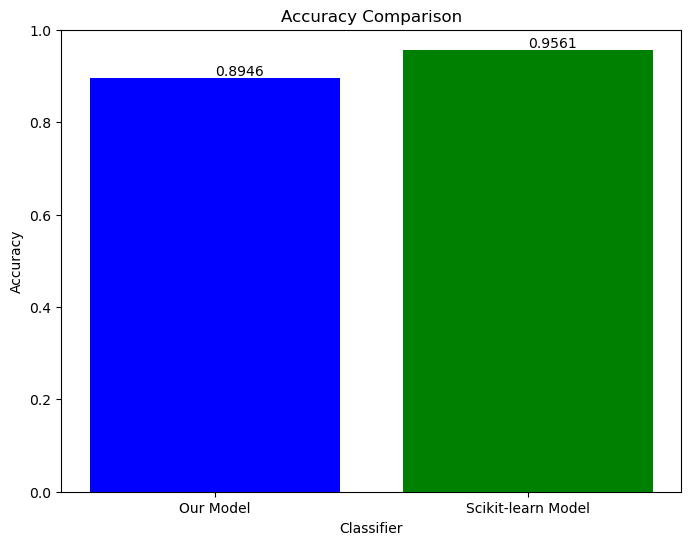

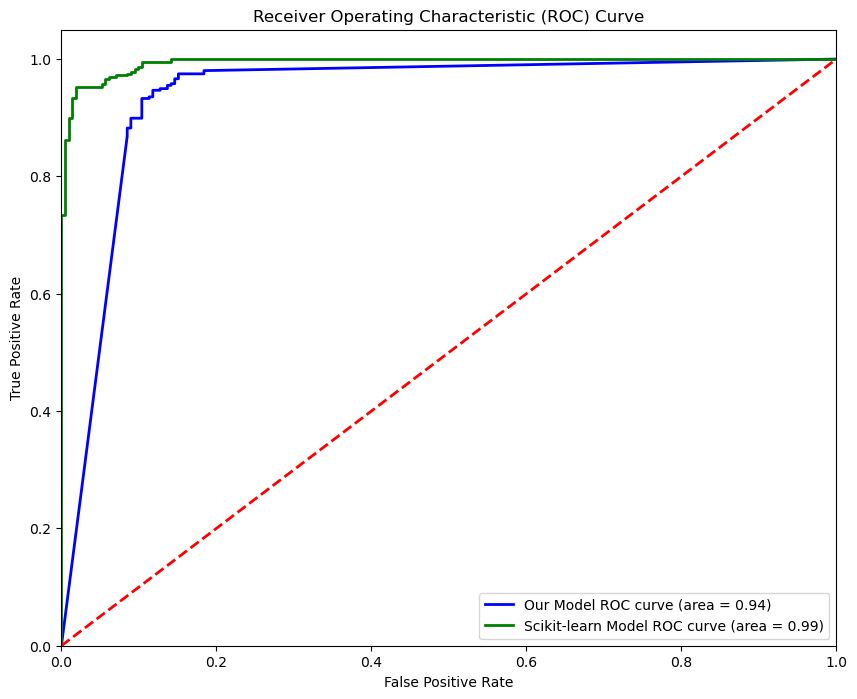

In [1]:
import sys
sys.path.insert(1, '../azlearn')

from linear_model.LogisticRegression import LogisticRegression as MyLogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Comparing logistic regression models")

myModel = MyLogisticRegression()
sklModel = SklearnLogisticRegression()

myModel.fit(X, y)
sklModel.fit(X, y)

y_pred = myModel.predict(X)
y_pred2 = sklModel.predict(X)

# Print predictions comparison
print("Predictions comparison (first 20 samples)")
for i in range(min(len(y), 20)):
    print(f"Actual: {y[i]}, Our model: {y_pred[i]}, scikit-learn model: {y_pred2[i]}")

# Evaluate models on the test set
accuracy_my = accuracy_score(y, y_pred)
accuracy_sklearn = accuracy_score(y, y_pred2)
print("\nAccuracy comparison")
print(f"Our model accuracy: {accuracy_my:.4f}")
print(f"Scikit-learn model accuracy: {accuracy_sklearn:.4f}")

# Predicted probabilities comparison
probas = myModel.predict_proba(X)
probas2 = sklModel.predict_proba(X)
print("\nPredicted probabilities comparison (first 5 samples)")
for i in range(min(len(y), 5)):
    print(f"Our model: {probas[i]}, Scikit-learn model: {probas2[i]}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
classifiers = ['Our Model', 'Scikit-learn Model']
accuracies = [accuracy_my, accuracy_sklearn]
bars = plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') 

plt.show()

# Plot ROC curve comparison
fpr_my, tpr_my, _ = roc_curve(y, probas[:, 1])
roc_auc_my = auc(fpr_my, tpr_my)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y, probas2[:, 1])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_my, tpr_my, color='blue', lw=2, label=f'Our Model ROC curve (area = {roc_auc_my:.2f})')
plt.plot(fpr_sklearn, tpr_sklearn, color='green', lw=2, label=f'Scikit-learn Model ROC curve (area = {roc_auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
